# Bike Sharing Assignment

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

#### Data understanding

In [2]:
#Import the dataset
bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Check the shape
bike_sharing.shape

(730, 16)

In [4]:
#Check the info
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# We already see that there are no null values from the above info, we can also use 
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the data

In [6]:
#Check description of statistics
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The target variable is "cnt" which is the total of casual and registered, hence, we can drop these two columns, as they are not useful for now, we can also drop "instant" column as it is the index column

In [7]:
# Dropping casual and registered column
bike_sharing.drop(["casual","registered","instant"], axis=1, inplace=True)

In [8]:
# Check the shape of dataset
bike_sharing.shape

(730, 13)

In [9]:
# Chcek the head of the dataset
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Exploratory Data Analysis

From the data dictionary, we can see that the below columns appear to be categorical variables, wherein we need to map certain integers to respective category
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [10]:
# Mapping season column
bike_sharing["season"] = bike_sharing["season"].map({1 : "spring", 2 : "summer", 3 : "fall", 4 : "winter"})
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Mapping year column
bike_sharing["yr"] = bike_sharing["yr"].map({0:"2018",1:"2019"})
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Mapping month column
bike_sharing["mnth"] = bike_sharing["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Mapping Weathersit column
# Considering shortcuts 1: "Clear", 2: "Mist", 3: "Light", 4: "Heavy" and mapping accordingly
bike_sharing["weathersit"] = bike_sharing["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light", 4: "Heavy"})
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In dteday column, we do again have year and month, we can just have a date column by dropping month and year

In [14]:
# Considering only date and creating a new column named date and dropping the current column
bike_sharing['date'] = bike_sharing['dteday'].apply(lambda x: int(x.split('-')[0]))
bike_sharing.drop("dteday", axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date
0,spring,2018,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


We have "weekday" column which needs to be mapped, it is unclear about the mapping as respective weekdays aren't provided<br><br>
Considering calendar and checking 1st jan 2018 appeared to be Monday
The mapping according to the considerations is 6: "Mon", 0: "Tue", 1: "Wed", 2: "Thu", 3: "Fri", 4:"Sat", 5: "Sun" But, this mapping seems wrong if we check "workingday" column.<br> <br>
Let us consider "workingday" column and map, it will be 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6:"Sat", 0: "Sun"


In [15]:
# Mapping weekday column
bike_sharing["weekday"] = bike_sharing["weekday"].map({1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6:"Sat", 0: "Sun"})
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


#### Univariate Analysis

In [16]:
Categorical_vars = ["season", "yr", "mnth", "weekday", "workingday", "weathersit", "holiday"]

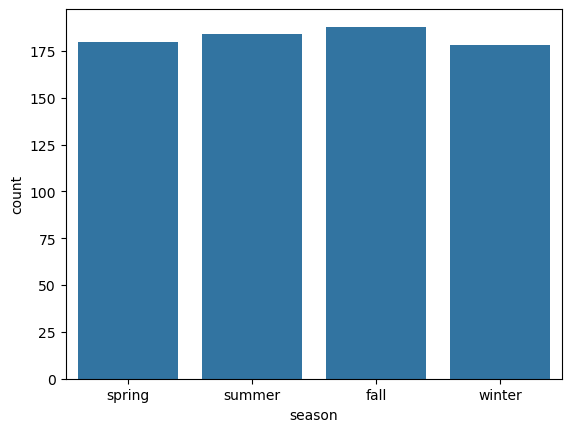

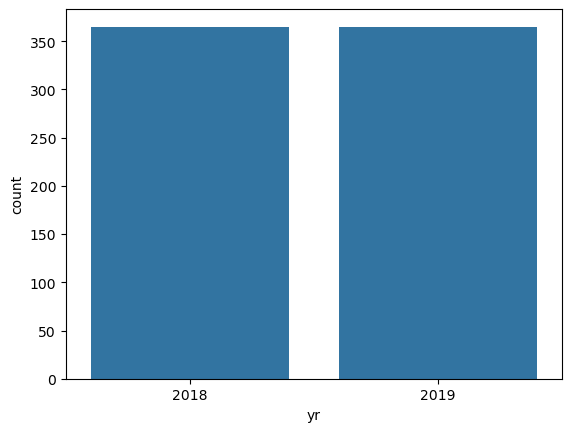

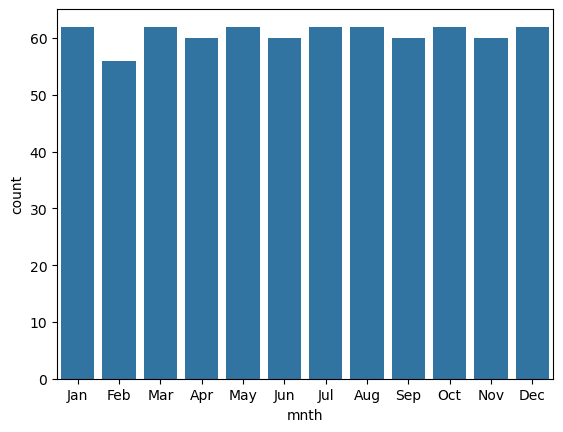

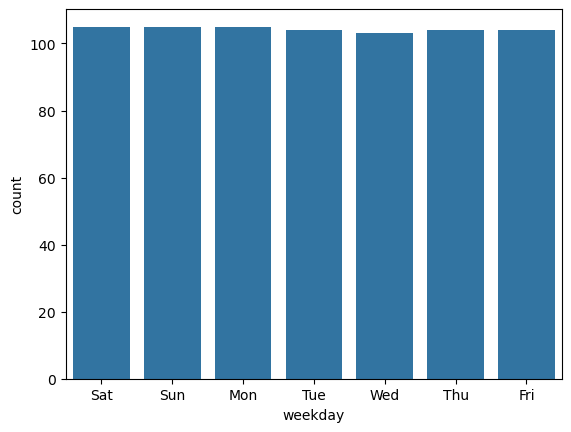

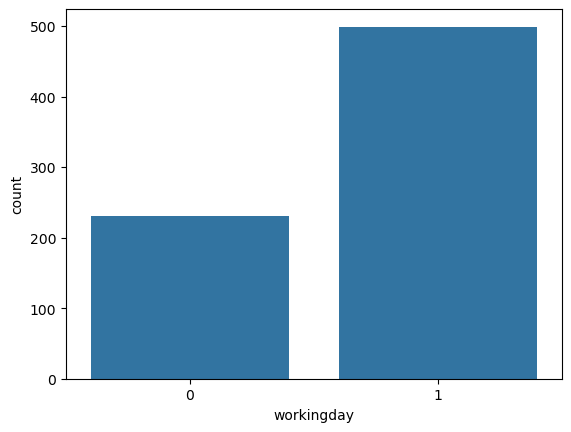

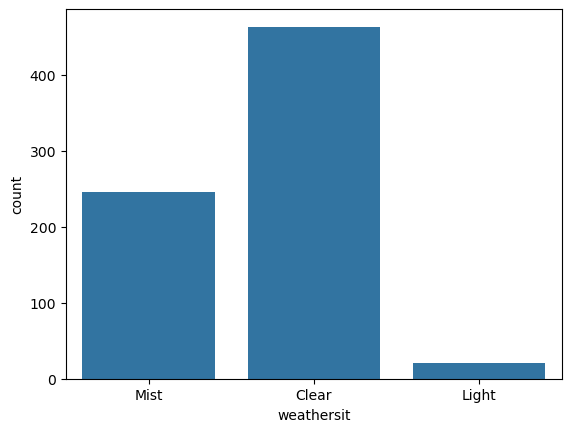

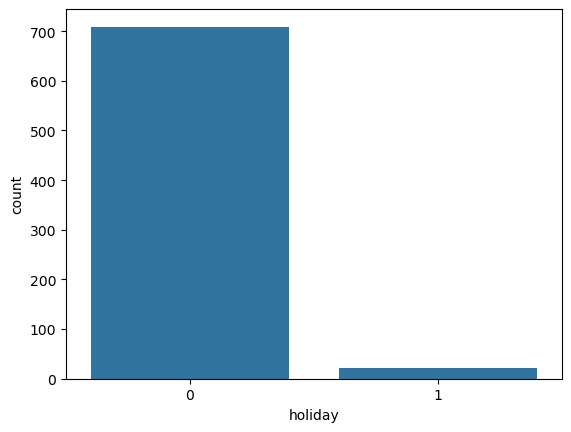

In [17]:
for i in Categorical_vars:
    sns.countplot(x=bike_sharing[i])
    plt.show()

From the analysis above, we can see a differential plot between workingday column and weathersit column

In [18]:
num_cols = ["temp","atemp","hum","windspeed","cnt"]

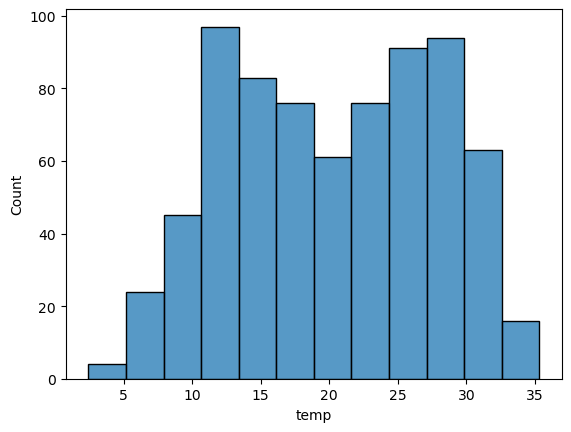

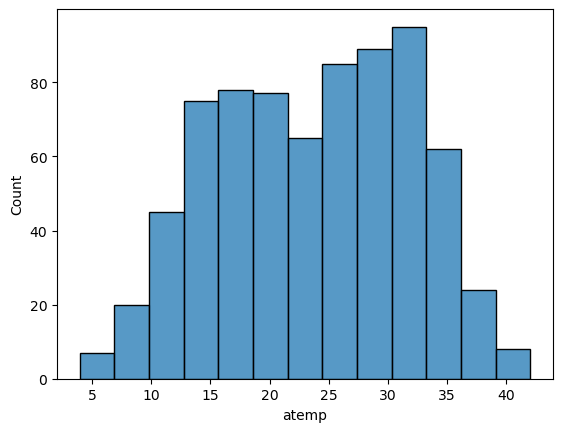

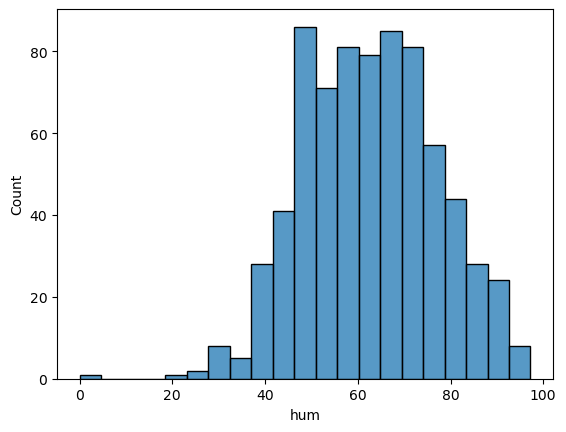

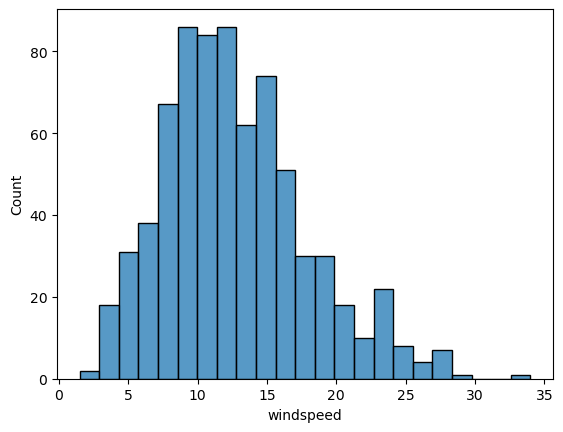

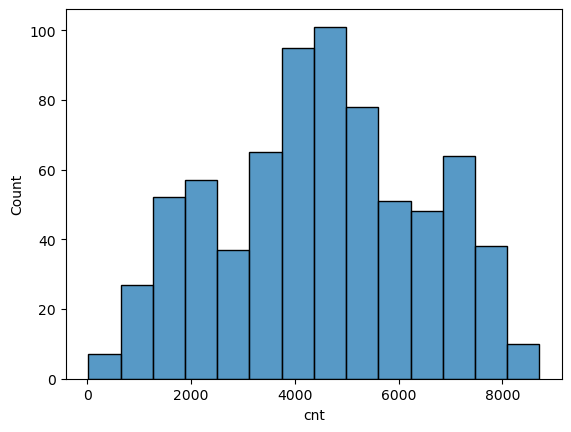

In [19]:
for i in num_cols:
    sns.histplot(x=bike_sharing[i])
    plt.show()

#### Bivariate Analysis

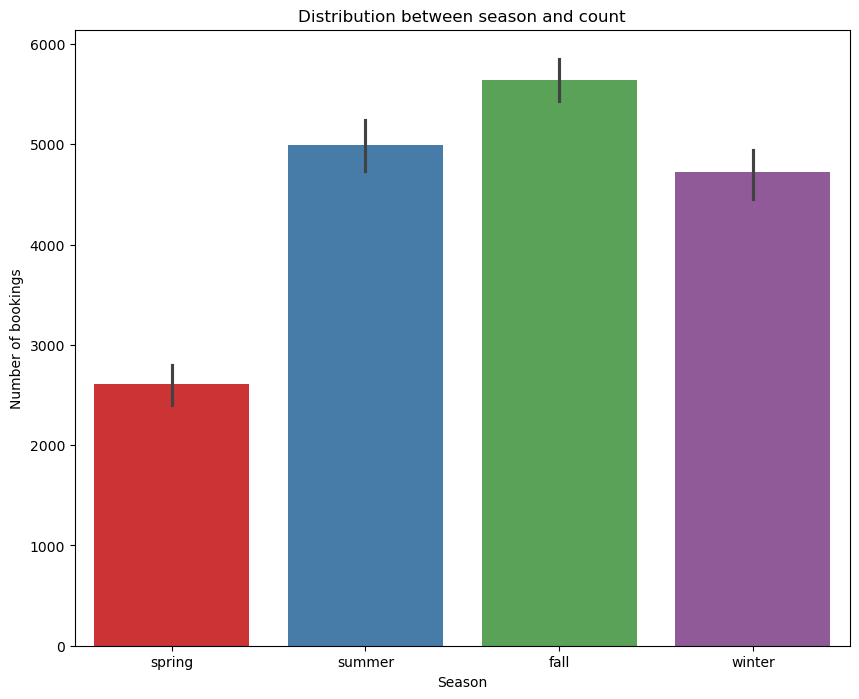

In [20]:
# Let us plot barplot between season and cnt
plt.figure(figsize=(10,8))
sns.barplot(data=bike_sharing, x="season", y="cnt", hue="season", palette="Set1")
plt.title("Distribution between season and count")
plt.xlabel("Season")
plt.ylabel("Number of bookings")
plt.show()

From the above plot, we can see that except spring season, rest all seasons have an average number of bookings. Fall season appears to be the attractive season

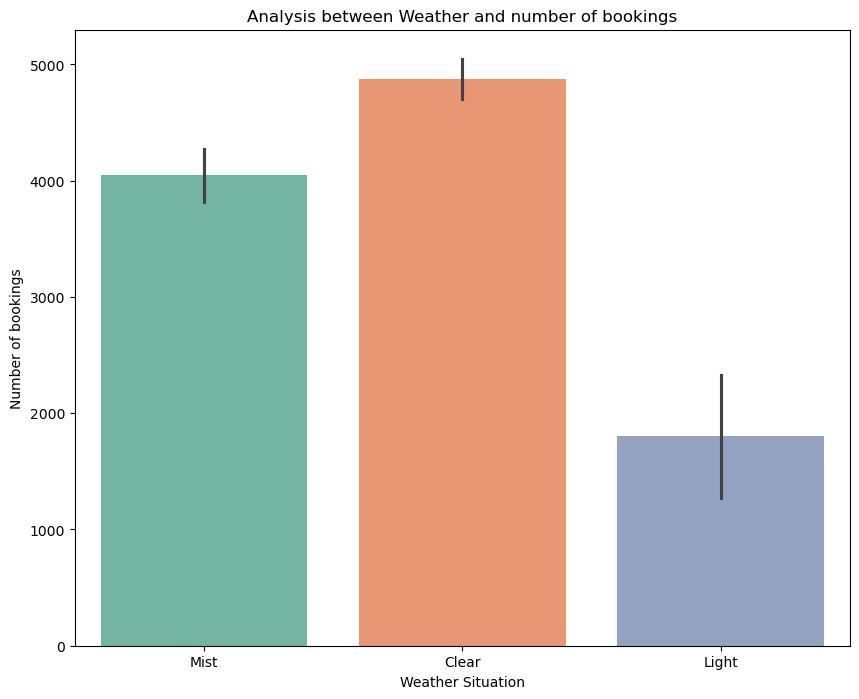

In [21]:
# Analysis by weather
plt.figure(figsize=(10,8))
sns.barplot(data=bike_sharing, x="weathersit",y="cnt", hue = "weathersit", palette="Set2")
plt.title("Analysis between Weather and number of bookings")
plt.xlabel("Weather Situation")
plt.ylabel("Number of bookings")
plt.show()

We can see that, when the weather is clear, there are more bookings

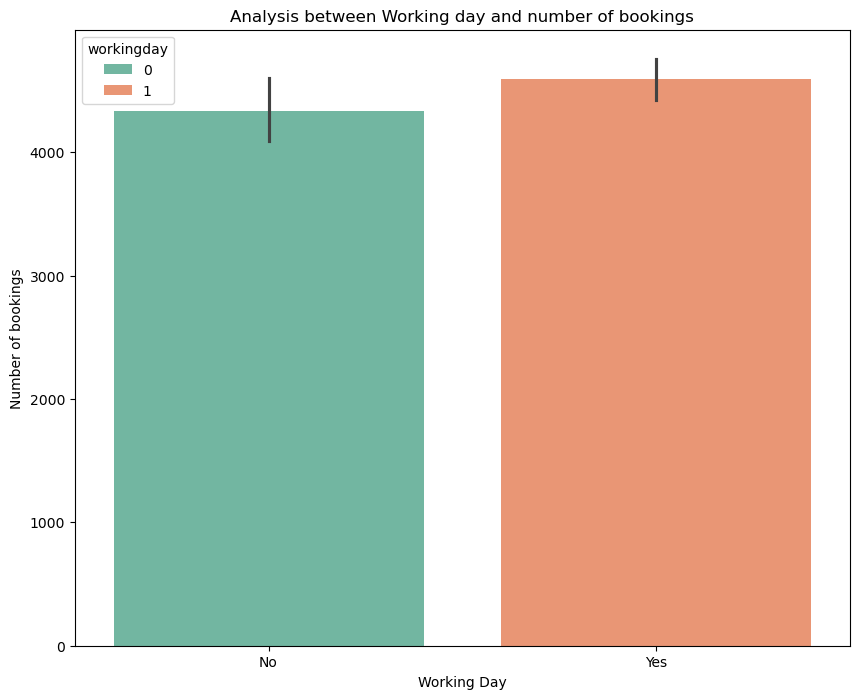

In [22]:
# Analysis between workingday column and cnt
plt.figure(figsize=(10,8))
sns.barplot(data=bike_sharing, x="workingday",y="cnt", hue = "workingday", palette="Set2")
plt.title("Analysis between Working day and number of bookings")
plt.xticks([0,1],["No", "Yes"])
plt.xlabel("Working Day")
plt.ylabel("Number of bookings")
plt.show()

From the above plot, we can see that, on working day, we see more number of bookings

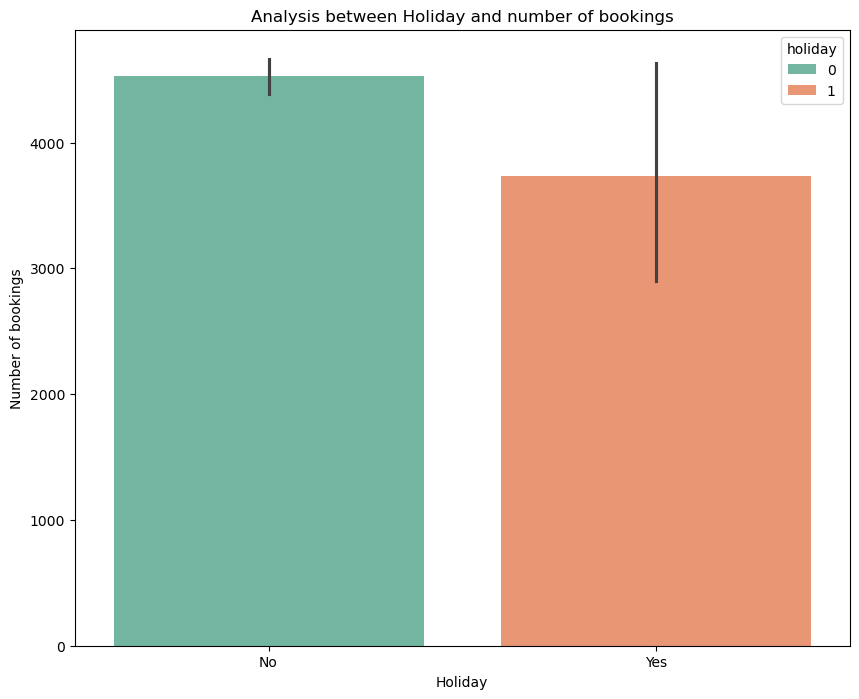

In [23]:
# Analysis between workingday column and cnt
plt.figure(figsize=(10,8))
sns.barplot(data=bike_sharing, x="holiday",y="cnt", hue = "holiday", palette="Set2")
plt.title("Analysis between Holiday and number of bookings")
plt.xticks([0,1],["No", "Yes"])
plt.xlabel("Holiday")
plt.ylabel("Number of bookings")
plt.show()

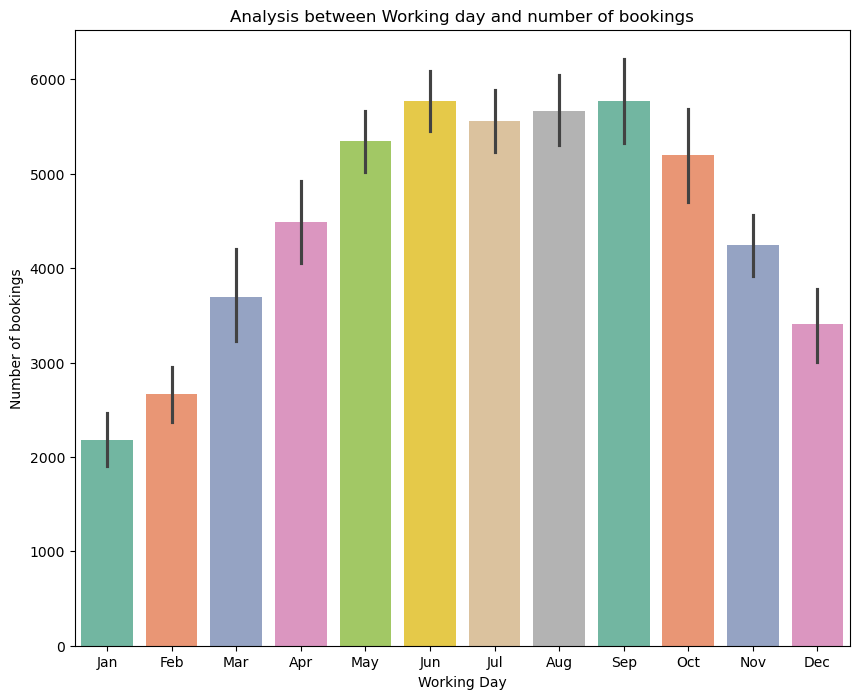

In [24]:
# Analysis between workingday column and cnt
plt.figure(figsize=(10,8))
sns.barplot(data=bike_sharing, x="mnth",y="cnt", hue = "mnth", palette="Set2")
plt.title("Analysis between Working day and number of bookings")
plt.xlabel("Working Day")
plt.ylabel("Number of bookings")
plt.show()

#### Multivariate Analysis

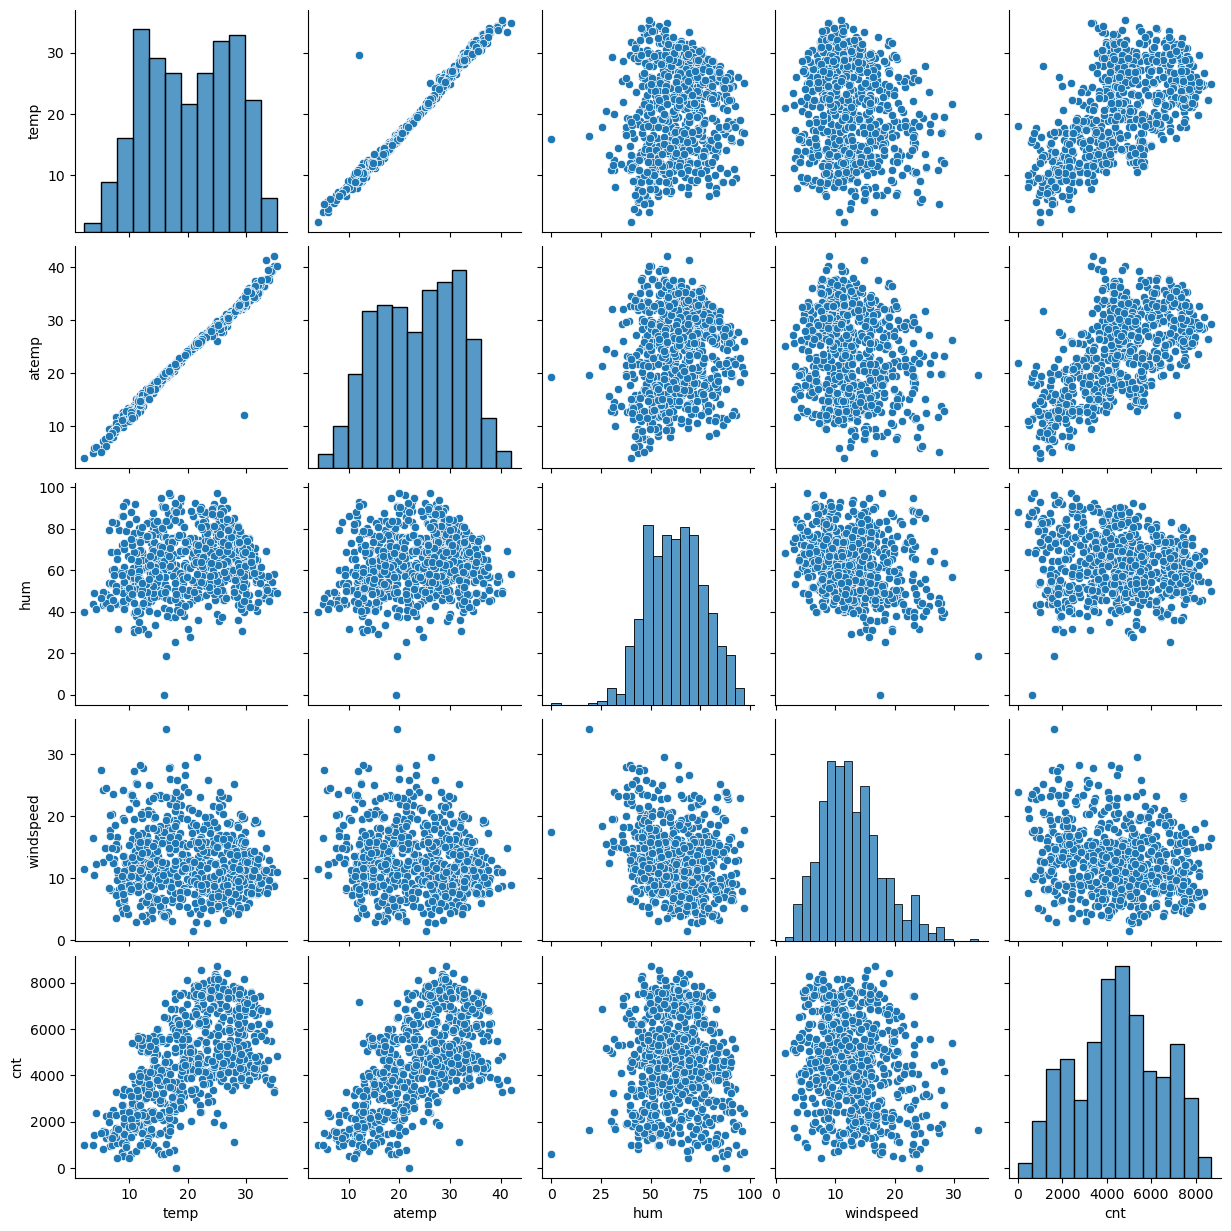

<Figure size 1000x800 with 0 Axes>

In [25]:
# Visualizing the numeric variables
sns.pairplot(bike_sharing, vars=num_cols)
plt.figure(figsize=(10,8))
plt.show()

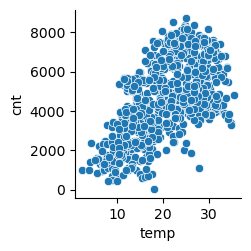

In [26]:
sns.pairplot(x_vars="temp",y_vars="cnt", data=bike_sharing)

From the above pairplot, we can see that there is a linear relationship between temp column and atemp column. We can't use both the variables because of multicollinearity.

#### Data Preprocessing for Modelling

In [27]:
# Creating dummy variables as these columns have more than 2 categories
seasons=pd.get_dummies(bike_sharing["season"],drop_first=True, dtype=int)
weathersit=pd.get_dummies(bike_sharing["weathersit"],drop_first=True,dtype=int)
months=pd.get_dummies(bike_sharing["mnth"],drop_first=True,dtype=int)
weekdays=pd.get_dummies(bike_sharing["weekday"],drop_first=True,dtype=int)

In [28]:
# Merging the dataframes and dropping the original ones

bike_sharing_updated = pd.concat([bike_sharing,seasons,weathersit,weekdays,months],axis=1)


In [29]:
bike_sharing_updated.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [30]:
# We see that, it has 35 columns, let us drop season,mnt, weekday, weathersit and also date, atemp column
bike_sharing_updated.drop(["season", "weekday", "weathersit", "mnth", "date", "atemp"], axis=1, inplace=True)
bike_sharing_updated.head() 

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2018,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# Mapping yr column to 0 and 1 again from 2018 and 2019
bike_sharing_updated["yr"] = bike_sharing_updated["yr"].map({'2018':0,'2019':1})
bike_sharing_updated.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
bike_sharing_updated.shape

(730, 29)

#### Split the data into train and test

In [33]:
# Splitting the dataset into 70-30, train and test size
bs_train, bs_test = train_test_split(bike_sharing_updated, train_size = 0.7, random_state = 100)

In [34]:
print(bs_train.shape)
print(bs_test.shape)

(510, 29)
(220, 29)


### If the coefficients are interpreted, we need to scale the features for getting coefficients at a comparable scale

In [35]:
# 1. Instantiate an object
scaler = MinMaxScaler()
num_cols = ["temp", "hum", "windspeed", "cnt"]
#2. Fit on data
bs_train[num_cols] = scaler.fit_transform(bs_train[num_cols])
bs_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bs_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After scaling, the data looks good for comparing

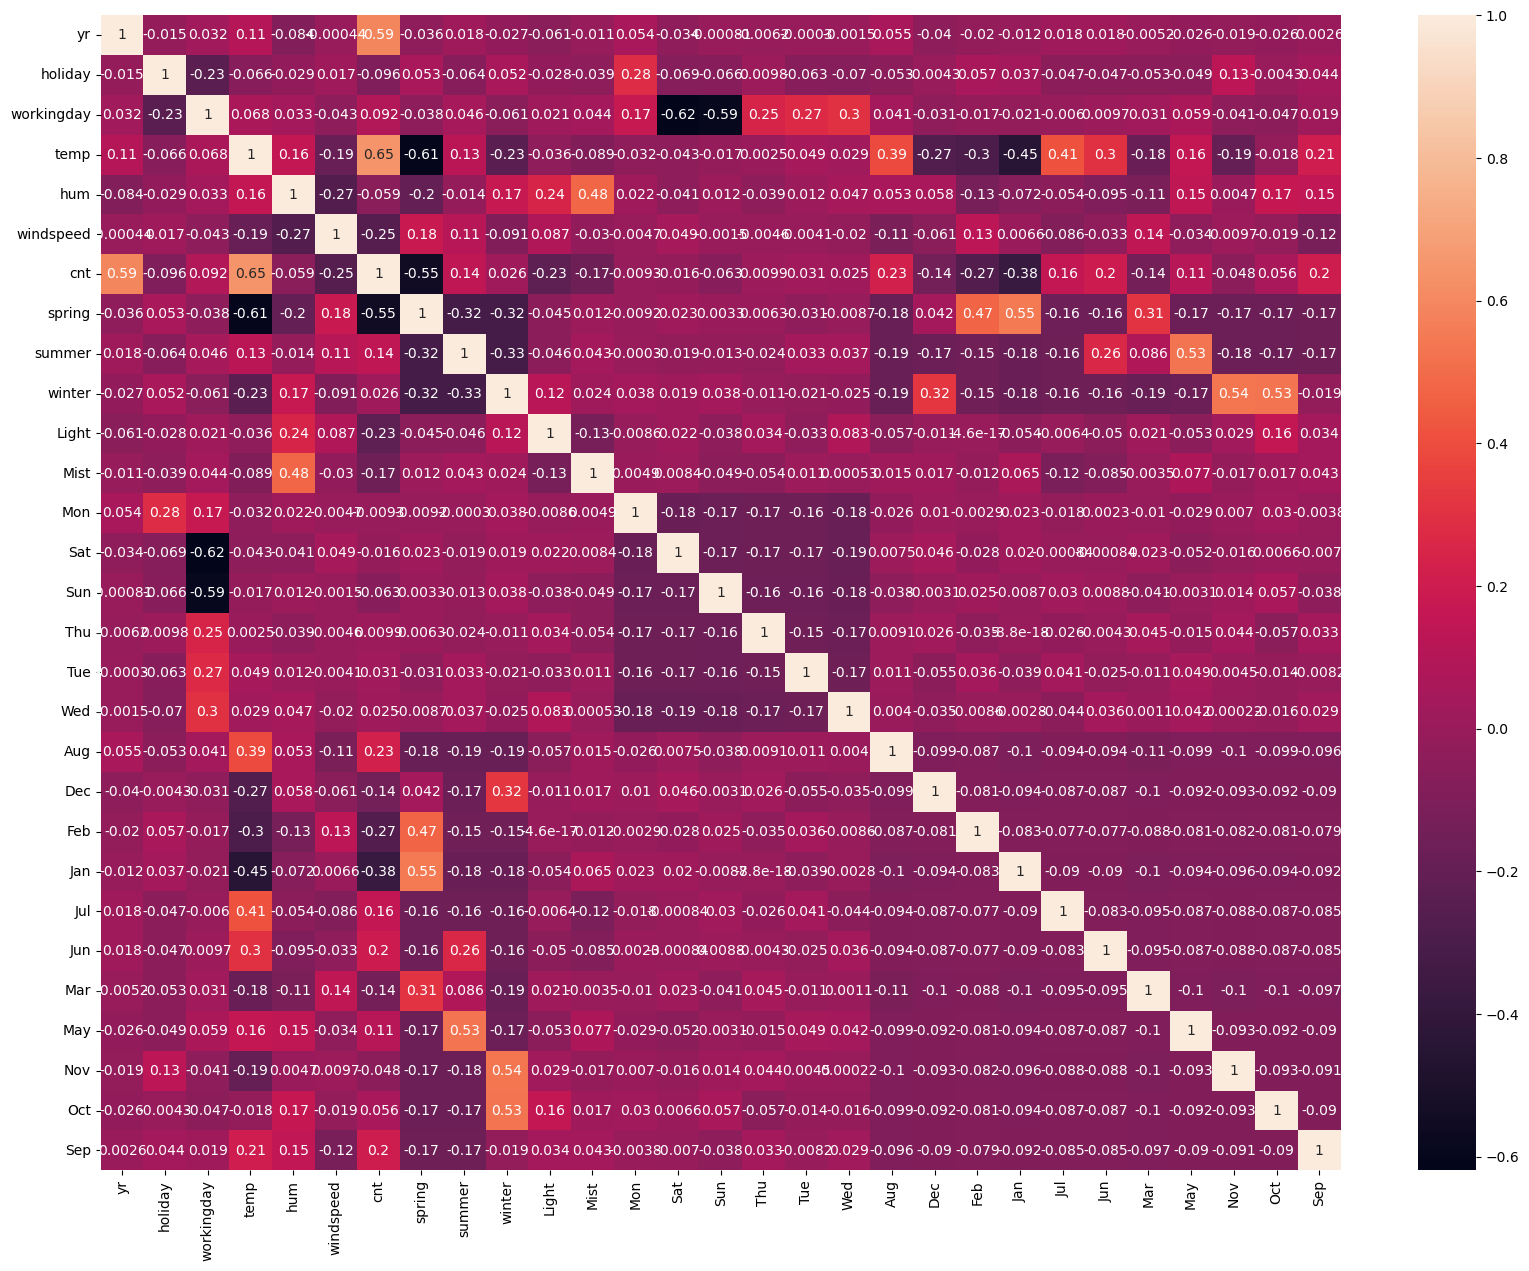

In [37]:
# Plotting a heatmap for 
plt.figure(figsize=(20,15))
sns.heatmap(bs_train.corr(), annot=True)
plt.show()

From the heatmap, after checking the cnt variables x+correlation with others, we can see that the highly correlated ones are yr, temp, atemp

In [38]:
#X_train, y_train
y_train = bs_train.pop('cnt')
X_train = bs_train

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Recursive feature elimination

lr = LinearRegression()
lr.fit(X_train,y_train)

# Considering 12 best features
rfe = RFE(lr, n_features_to_select=12)       
rfe = rfe.fit(X_train, y_train)

In [41]:
#List of the 12 top best variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light', True, 1),
 ('Mist', True, 1),
 ('Mon', False, 11),
 ('Sat', False, 2),
 ('Sun', False, 10),
 ('Thu', False, 13),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Aug', False, 9),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 17),
 ('May', False, 8),
 ('Nov', False, 5),
 ('Oct', False, 15),
 ('Sep', True, 1)]

In [42]:
# selecting the variables via RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light', 'Mist', 'Jul', 'Sep'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light', 'Mist', 'Jul', 'Sep'],
      dtype='object')

In [45]:
# Adding a constant variable 
X_train_sm_1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_sm_1).fit()
print(lm_1.params)
lm_1.summary()

const        0.284754
yr           0.229357
holiday     -0.096878
temp         0.529863
hum         -0.172595
windspeed   -0.182190
spring      -0.056371
summer       0.053078
winter       0.097610
Light       -0.236920
Mist        -0.052653
Jul         -0.057247
Sep          0.083251
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.95e-190
Time:                        20:28:26   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.000       0.217       0.353
yr             0.2294      0.008     28.208      0.000       0.213       0.245
holiday       -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp           0.5299      0.034     15.728      0.000       0.464       0.596
hum           -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed     -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring        -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer         0.0531      0.015      3.536      0.000       0.024       0.083
winter         0.0976      0.017      5.643      0.000       0.064       0.132
Light         -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist          -0.0527      0.010     -5.017      0.000      -0.073      -0.032
Jul           -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep            0.0833      0.017      4.973      0.000       0.050       0.116
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary p-value for all the variables is less than 0.05, Lets calculate VIF

In [46]:
# Generic function to calculate VIF

def calculateVIF(input_df):
    vif = pd.DataFrame()
    vif['Features'] = input_df.columns
    vif['VIF'] = [variance_inflation_factor(input_df.values, i) for i in range(input_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [47]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
9,Mist,2.28
0,yr,2.08
10,Jul,1.58
11,Sep,1.38


In [48]:
# Hum has high VIF, lets us drop it
X_train_rfe = X_train_rfe.drop("hum",axis=1)

In [49]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,Jul,1.58
8,Mist,1.55
10,Sep,1.34
7,Light,1.08


In [50]:
# Adding a constant variable 
X_train_sm_2 = sm.add_constant(X_train_rfe)
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_sm_2).fit()
print(lm_2.params)
lm_2.summary()

const        0.199434
yr           0.233570
holiday     -0.097463
temp         0.490988
windspeed   -0.147919
spring      -0.067169
summer       0.046487
winter       0.081741
Light       -0.284199
Mist        -0.080167
Jul         -0.052057
Sep          0.076846
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.06e-187
Time:                        20:28:27   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
yr             0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
Light         -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist          -0.0802      0.009     -9.146      0.000      -0.097      -0.063
Jul           -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep            0.0768      0.017      4.517      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The above is our final model after the below analysis with R-square : 0.835 and Adjusted R-square: 0.832

P-values are good and the next variable with high VIF is temp, lets drop it and check R-squared

In [51]:
# Dropping temp
X_train_temp_drop = X_train_rfe.drop("temp",axis=1)
calculateVIF(X_train_temp_drop)

,Features,VIF
2,windspeed,3.81
3,spring,2.07
4,summer,2.01
0,yr,1.83
5,winter,1.73
7,Mist,1.52
8,Jul,1.19
9,Sep,1.16
6,Light,1.08
1,holiday,1.04


In [52]:
# VIF values and <5 and good, let us calculate the OLS

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_temp_drop)
# Running the linear model
lm_new = sm.OLS(y_train,X_train_sm).fit()
print(lm_new.params)
lm_new.summary()

const        0.583711
yr           0.247188
holiday     -0.100456
windspeed   -0.170537
spring      -0.300492
summer      -0.044921
winter      -0.079349
Light       -0.295886
Mist        -0.089457
Jul         -0.012681
Sep          0.072716
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.02e-149
Time:                        20:28:27   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5837      0.017     34.708      0.000       0.551       0.617
yr             0.2472      0.010     25.204      0.000       0.228       0.266
holiday       -0.1005      0.031     -3.215      0.001      -0.162      -0.039
windspeed     -0.1705      0.030     -5.676      0.000      -0.230      -0.112
spring        -0.3005      0.017    -17.823      0.000      -0.334      -0.267
summer        -0.0449      0.017     -2.693      0.007      -0.078      -0.012
winter        -0.0793      0.016     -4.941      0.000      -0.111      -0.048
Light         -0.2959      0.030     -9.988      0.000      -0.354      -0.238
Mist          -0.0895      0.010     -8.541      0.000      -0.110      -0.069
Jul           -0.0127      0.022     -0.573      0.567      -0.056       0.031
Sep            0.0727      0.020      3.568      0.000       0.033       0.113
==============================================================================
Omnibus:                       26.128   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.105
Skew:                          -0.293   Prob(JB):                     2.94e-12
Kurtosis:                       4.468   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We see that R-squared has dropped to 0.76, we can go back keep the temp variable although i have tried more droppings though got less r-squared value below

In [53]:
# Jul has high p-value of 0.656 and R-squared dropped to 0.78, let's drop Jul now
X_train_temp_drop = X_train_temp_drop.drop("Jul",axis=1)
calculateVIF(X_train_temp_drop)

,Features,VIF
2,windspeed,3.46
3,spring,1.91
4,summer,1.86
0,yr,1.77
5,winter,1.63
7,Mist,1.51
8,Sep,1.14
6,Light,1.08
1,holiday,1.04


In [54]:
# VIF values and <5 and good, let us calculate the OLS

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_temp_drop)
# Running the linear model
lm_new = sm.OLS(y_train,X_train_sm).fit()
print(lm_new.params)
lm_new.summary()

const        0.578998
yr           0.247236
holiday     -0.100150
windspeed   -0.170429
spring      -0.296001
summer      -0.040431
winter      -0.075101
Light       -0.296014
Mist        -0.089040
Sep          0.076263
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.30e-150
Time:                        20:28:27   Log-Likelihood:                 405.99
No. Observations:                 510   AIC:                            -792.0
Df Residuals:                     500   BIC:                            -749.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5790      0.015     39.491      0.000       0.550       0.608
yr             0.2472      0.010     25.227      0.000       0.228       0.266
holiday       -0.1002      0.031     -3.208      0.001      -0.161      -0.039
windspeed     -0.1704      0.030     -5.676      0.000      -0.229      -0.111
spring        -0.2960      0.015    -19.841      0.000      -0.325      -0.267
summer        -0.0404      0.015     -2.748      0.006      -0.069      -0.012
winter        -0.0751      0.014     -5.276      0.000      -0.103      -0.047
Light         -0.2960      0.030    -10.000      0.000      -0.354      -0.238
Mist          -0.0890      0.010     -8.528      0.000      -0.110      -0.069
Sep            0.0763      0.019      3.930      0.000       0.038       0.114
==============================================================================
Omnibus:                       26.217   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.014
Skew:                          -0.296   Prob(JB):                     3.08e-12
Kurtosis:                       4.464   Cond. No.                         8.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all variables are good now, but considering R-squared as which is less when compared to the previous temp column drop, we can revert back to previous step

#### Final Model lm_2 and X_train_sm2

In [55]:
# Without dropping temp, we have the variables stored in X_train_updated, let us check
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,Jul,1.58
8,Mist,1.55
10,Sep,1.34
7,Light,1.08


In [56]:
lm_2.params

const        0.199434
yr           0.233570
holiday     -0.097463
temp         0.490988
windspeed   -0.147919
spring      -0.067169
summer       0.046487
winter       0.081741
Light       -0.284199
Mist        -0.080167
Jul         -0.052057
Sep          0.076846
dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
# lm_2 is the final model
y_train_cnt = lm_2.predict(X_train_sm_2)

Text(0.5, 0, 'Errors')

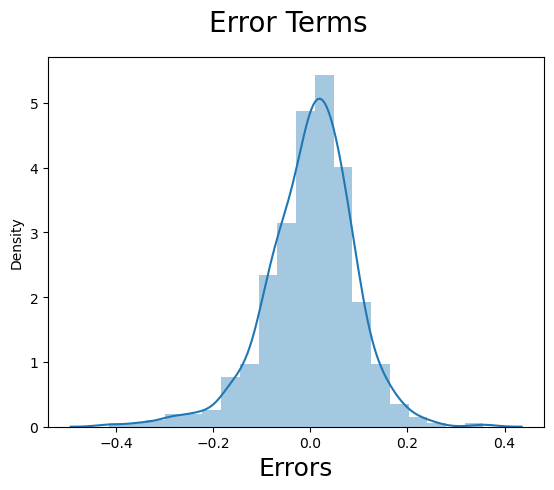

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making Predictions

In [59]:
bs_test[num_cols] = scaler.transform(bs_test[num_cols])

#### Dividing into X_test and y_test

In [60]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [61]:
col1 = X_train_rfe.columns
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Light', 'Mist', 'Jul', 'Sep'],
      dtype='object')

In [62]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col1]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
# Making predictions
y_pred = lm_2.predict(X_test_new)


In [64]:
r2 = r2_score(y_test, y_pred)
print("R-square for Test Data: ",round(r2,4))

R-square for Test Data:  0.8053


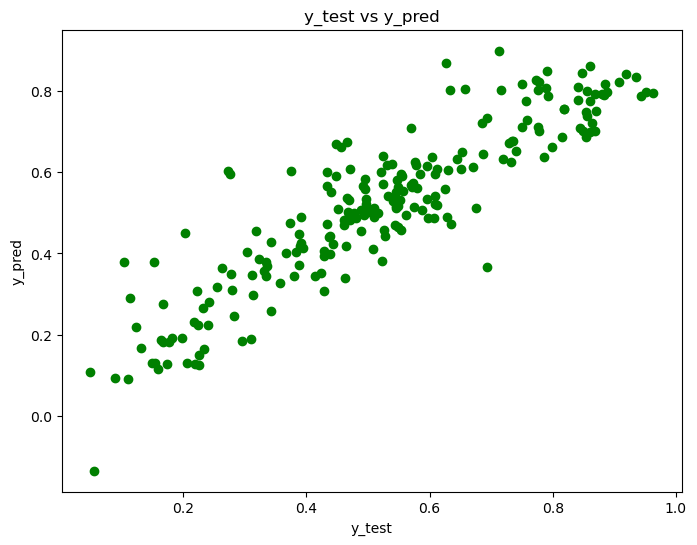

In [65]:
# Plotting y_test and y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred,color="green")
plt.title("y_test vs y_pred")
plt.xlabel('y_test')
plt.ylabel('y_pred') 
plt.show()

In [66]:
round(lm_2.params,2)

const        0.20
yr           0.23
holiday     -0.10
temp         0.49
windspeed   -0.15
spring      -0.07
summer       0.05
winter       0.08
Light       -0.28
Mist        -0.08
Jul         -0.05
Sep          0.08
dtype: float64

#### Best fit line = 0.20 + 0.23 * yr - 0.10 * holiday + 0.49 * temp - 0.15 * windspeed - 0.07 * spring + 0.05 * summer + 0.08 * winter - 0.28 * Light - 0.08 * Mist - 0.05 * Jul + 0.08 * Sep

In [67]:
# Calculating Adjusted-R^2 value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7767


#### Observation of R-Square values: 
- Train dataset R-square : 0.835
- Test dataset R-square: 0.8053
- Train dataset Adjusted R-square : 0.832    
- Test dataset Adjusted R-square  : 0.7767


#### Homoscedasticity - Homoscedasticity is an assumption in linear regression models that states the variance of the residuals

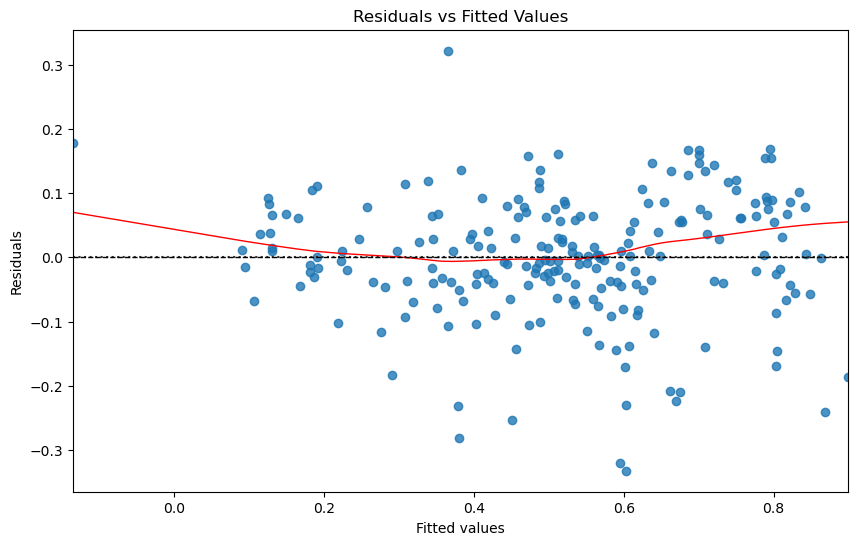

In [68]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test-y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

In [69]:
coefficients = lm_2.params
p_values = lm_2.pvalues

# Creating a DataFrame for easy viewing
results = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'p-value': p_values.values
})

# Sorting the features by significance (p-value) and magnitude of coefficients
results = results.sort_values(by=['p-value', 'Coefficient'], ascending=[True, False])
print(results)

      Feature  Coefficient        p-value
1          yr     0.233570  5.529066e-106
3        temp     0.490988   3.328227e-41
8       Light    -0.284199   2.957612e-27
9        Mist    -0.080167   1.507878e-18
0       const     0.199434   4.228080e-11
4   windspeed    -0.147919   7.244031e-09
7      winter     0.081741   2.924724e-06
11        Sep     0.076846   7.843441e-06
2     holiday    -0.097463   2.083252e-04
5      spring    -0.067169   1.591962e-03
6      summer     0.046487   2.401185e-03
10        Jul    -0.052057   5.472981e-03
